In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
housing = pd.DataFrame(pd.read_csv("Housing.csv"))

In [3]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Making sure there are no NULL values.


In [5]:
housing.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

DATA PREPROCESSING

As some of the values in the dataset have YES or NO, but for the model we need to have 0 or 1. The map function takes yes or no as an input and return 1 or 0. Varlist variable defined which columns of the csv file we are processing


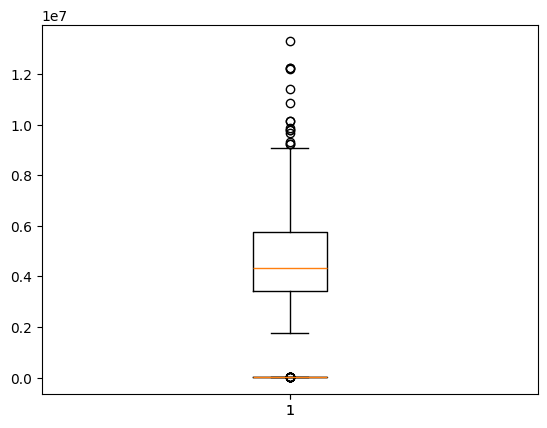

In [6]:
plt.boxplot(housing.price)
Q1 = housing.price.quantile(0.25)
Q3 = housing.price.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.price >= Q1 - 1.5*IQR) & (housing.price <= Q3 + 1.5*IQR)]

plt.boxplot(housing.area)
Q1 = housing.area.quantile(0.25)
Q3 = housing.area.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.area >= Q1 - 1.5*IQR) & (housing.area <= Q3 + 1.5*IQR)]

In [7]:
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def map(x):
  return x.map({'yes': 1, 'no': 0})

housing[varlist] = housing[varlist].apply(map)

YES and NO have been converted to 0 and 1

In [8]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


Furnishingstatus still has non-binary values, we need to process those into binary values as well

In [9]:
furnishing_status = pd.get_dummies(housing['furnishingstatus'])
furnishing_status.head()

,furnished,semi-furnished,unfurnished
15,False,True,False
16,False,False,True
17,True,False,False
18,True,False,False
19,False,True,False


We don't need three columns, we can tell the furnishing status with only semi-furnished and unfurnished columns.
If semi-furnished is False and unfurnished is True -> Unfurnished
If semi-furnished is True and unfurnished is True -> Furnished

In [10]:
furnishing_status = pd.get_dummies(housing['furnishingstatus'], drop_first = True)
furnishing_status.head()


,semi-furnished,unfurnished
15,True,False
16,False,True
17,False,False
18,False,False
19,True,False


In [11]:
housing = pd.concat([housing, furnishing_status], axis = 1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,True,False
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,False,True
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,False,False
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,False,False
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,True,False


In [12]:
housing['unfurnished'].dtype

dtype('bool')

Now we can drop furnishing status

In [13]:
housing.drop(['furnishingstatus'], axis = 1, inplace = True)

In [14]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,True,False
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,False,True
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,False,False
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,False,False
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,True,False


In [15]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size= 0.7, test_size=0.3, random_state=9)

print("Training set shape:", df_train.shape)
print("Testing set shape:", df_test.shape)


Training set shape: (361, 14)
Testing set shape: (156, 14)


In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
num_var = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

In [19]:
df_train[num_var] = scaler.fit_transform(df_train[num_var])

In [20]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
363,0.266667,0.222044,0.2,0.0,0.000000,1,0,0,1,0,0.000000,0,True,False
72,0.676190,0.386912,0.4,0.0,1.000000,1,0,0,0,1,0.000000,1,False,True
258,0.371429,0.274397,0.4,0.0,0.333333,1,0,0,0,0,0.333333,0,True,False
463,0.180952,0.165327,0.2,0.0,0.000000,1,1,1,0,0,0.000000,0,False,True
132,0.552381,0.407577,0.4,0.0,0.666667,1,0,0,0,1,0.000000,0,True,False


All the values have been converted to float64 by MinMaxScaler for Simple Linear Regression

In [21]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,0.374991,0.365455,0.385596,0.126039,0.261311,0.839335,0.168975,0.343490,0.044321,0.301939,0.215143,0.213296
std,0.218105,0.207658,0.146866,0.226785,0.287146,0.367731,0.375250,0.475532,0.206094,0.459736,0.283614,0.410204
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.219048,0.212400,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.333333,0.315729,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.504762,0.499426,0.400000,0.000000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


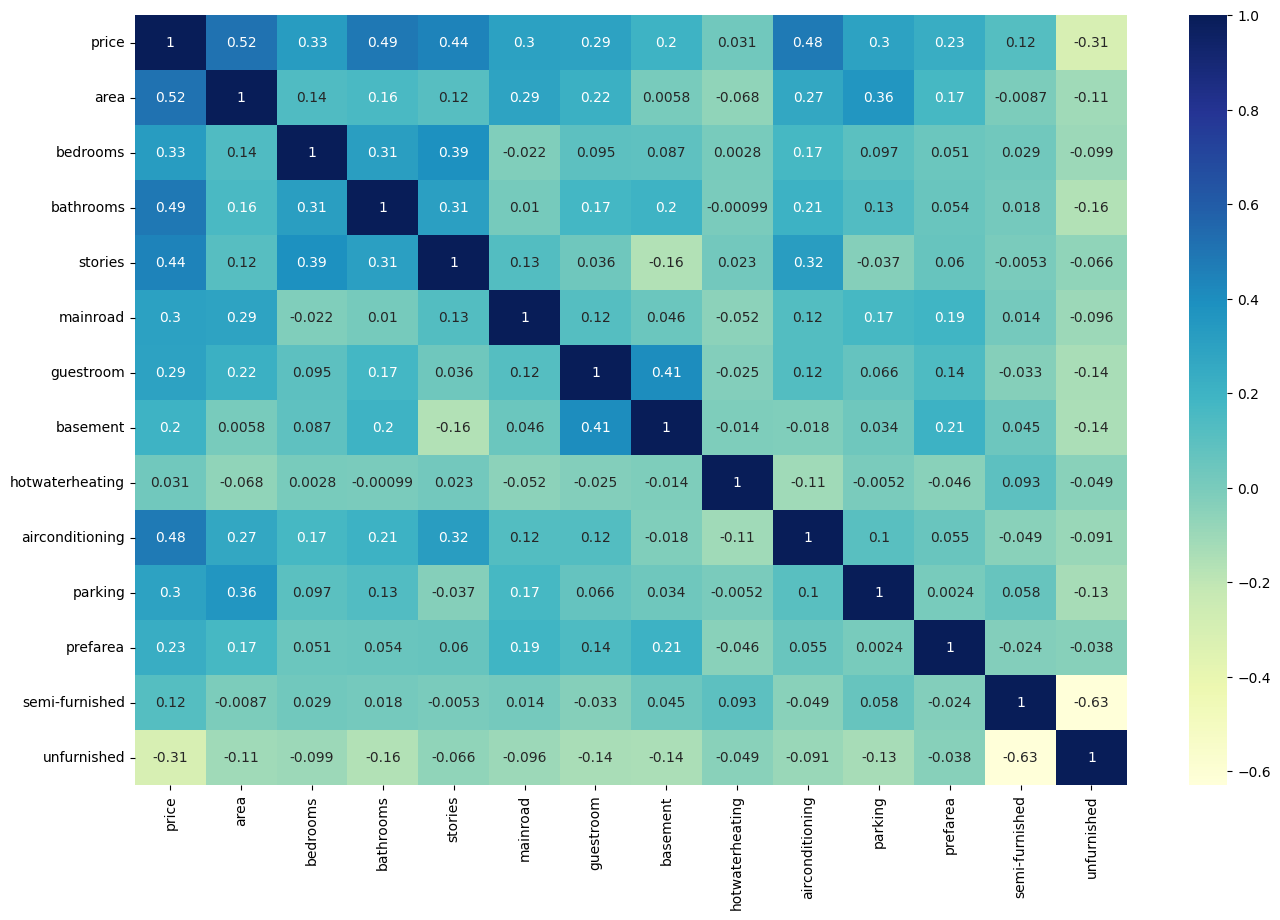

In [22]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

area seems to be correlated to price the most.

In [23]:
y_train = df_train.pop('price')
X_train = df_train

In [24]:
from sklearn.feature_selection import RFE
# recursive feature elimination
from sklearn.linear_model import LinearRegression

In [25]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [26]:
rfe = RFE(lm,n_features_to_select=6)
rfe = rfe.fit(X_train, y_train)

In [27]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('area', True, 1),
 ('bedrooms', False, 5),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', False, 3),
 ('guestroom', False, 7),
 ('basement', True, 1),
 ('hotwaterheating', False, 2),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', False, 6),
 ('semi-furnished', False, 8),
 ('unfurnished', False, 4)]

In [28]:
col = X_train.columns[rfe.support_]
col

Index(['area', 'bathrooms', 'stories', 'basement', 'airconditioning',
       'parking'],
      dtype='object')

In [29]:
X_train.columns[~rfe.support_]

Index(['bedrooms', 'mainroad', 'guestroom', 'hotwaterheating', 'prefarea',
       'semi-furnished', 'unfurnished'],
      dtype='object')

In [30]:
X_train_rfe = X_train[col]
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [31]:
lm = sm.OLS(y_train, X_train_rfe).fit()

In [32]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     92.61
Date:                Fri, 14 Feb 2025   Prob (F-statistic):           1.70e-69
Time:                        11:53:39   Log-Likelihood:                 208.33
No. Observations:                 361   AIC:                            -402.7
Df Residuals:                     354   BIC:                            -375.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0730      0.017     

In [33]:
df_test[num_var] = scaler.fit_transform(df_test[num_var])

In [34]:
y_test = df_test.pop('price')
X_test = df_test

In [35]:
X_test = sm.add_constant(X_test)
X_test_rfe = X_test[X_train_rfe.columns]


In [36]:
y_pred = lm.predict(X_test_rfe)

In [37]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6039611410947641

Text(0, 0.5, 'y_pred')

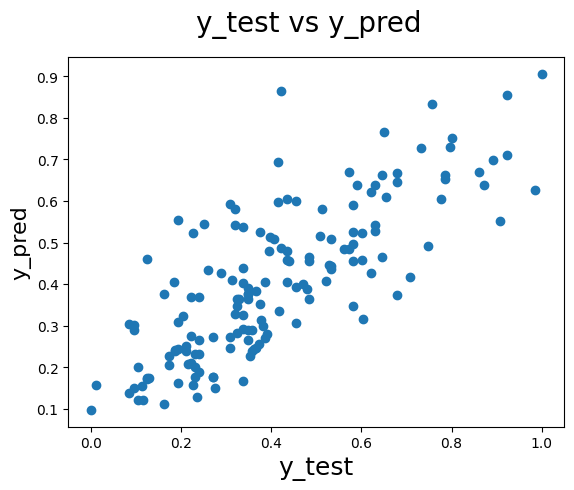

In [38]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)                          